# Новый раздел

In [ ]:
# Завантаження та підготовка даних.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

california_data = fetch_california_housing()

X = california_data.data
y = california_data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Побудова регресійної моделі.
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_train_pred = lr_model.predict(X_train)
y_test_pred = lr_model.predict(X_test)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Навчальні дані MSE: {train_mse:.2f}, R^2 = {train_r2:.2f}")
print(f"Тестові дані MSE: {test_mse:.2f}, R^2 = {test_r2:.2f}")

Навчальні дані MSE: 0.52, R^2 = 0.61
Тестові дані MSE: 0.56, R^2 = 0.58


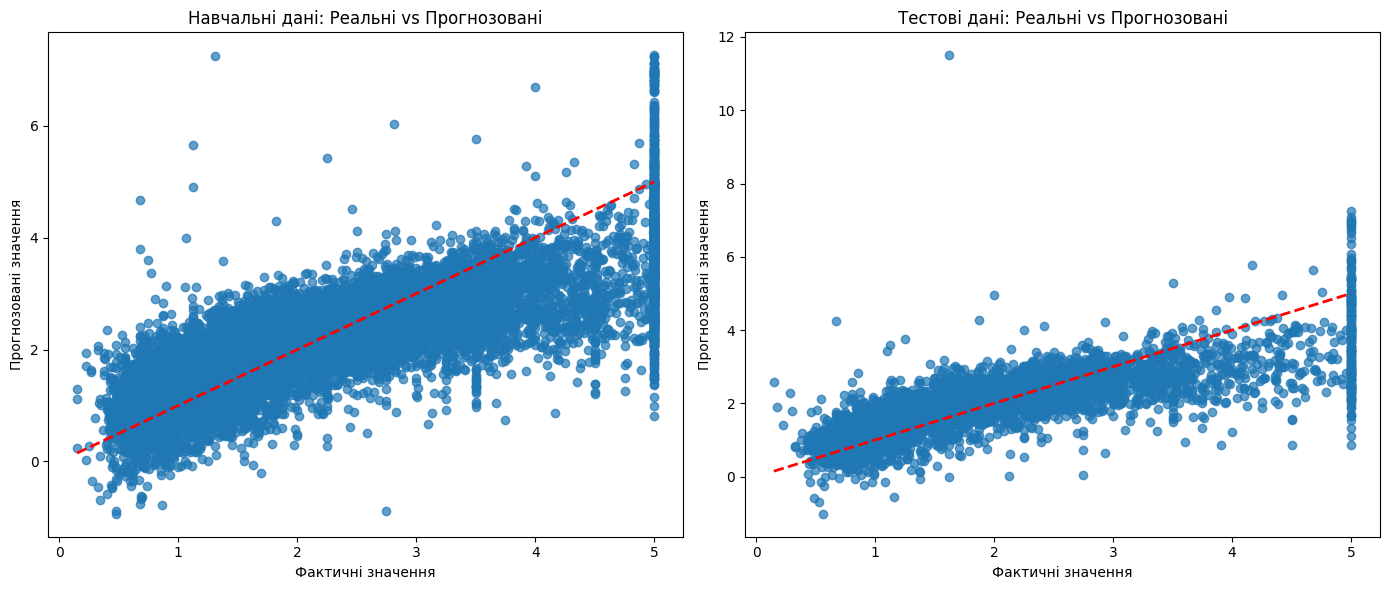

In [ ]:
# Аналіз перенавчання.
plt.figure(figsize=(14, 6))

# Візуалізація навчальних даних
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, alpha=0.7)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
plt.xlabel('Фактичні значення')
plt.ylabel('Прогнозовані значення')
plt.title('Навчальні дані: Реальні vs Прогнозовані')

# Візуалізація тестових даних
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Фактичні значення')
plt.ylabel('Прогнозовані значення')
plt.title('Тестові дані: Реальні vs Прогнозовані')

plt.tight_layout()
plt.show()


In [ ]:
# Запобігання перенавчанню.
alphas = np.logspace(0, 4, 100)

ridge_cv_scores = []
for alpha in alphas:
    ridge_model = Ridge(alpha=alpha)
    scores = cross_val_score(ridge_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    ridge_cv_scores.append(-scores.mean())

lasso_cv_scores = []
for alpha in alphas:
    lasso_model = Lasso(alpha=alpha)
    scores = cross_val_score(lasso_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    lasso_cv_scores.append(-scores.mean())


best_ridge_alpha = alphas[np.argmin(ridge_cv_scores)]
best_lasso_alpha = alphas[np.argmin(lasso_cv_scores)]

print(f"Найкраще значення Ridge: {best_ridge_alpha}")
print(f"Найкраще значення Lasso: {best_lasso_alpha}")

Найкраще значення Ridge: 8.497534359086444
Найкраще значення Lasso: 1.0


In [ ]:
# Оцінка результатів.
ridge_model = Ridge(alpha=best_ridge_alpha)
ridge_model.fit(X_train, y_train)
ridge_y_test_pred = ridge_model.predict(X_test)

lasso_model = Lasso(alpha=best_lasso_alpha)
lasso_model.fit(X_train, y_train)
lasso_y_test_pred = lasso_model.predict(X_test)

ridge_test_mse = mean_squared_error(y_test, ridge_y_test_pred)
lasso_test_mse = mean_squared_error(y_test, lasso_y_test_pred)
ridge_test_r2 = r2_score(y_test, ridge_y_test_pred)
lasso_test_r2 = r2_score(y_test, lasso_y_test_pred)

print(f"Ridge MSE: {ridge_test_mse:.2f}, R^2 = {ridge_test_r2:.2f}")
print(f"Lasso MSE: {lasso_test_mse:.2f}, R^2 = {lasso_test_r2:.2f}")

Ridge MSE: 0.56, R^2 = 0.58
Lasso MSE: 0.94, R^2 = 0.28


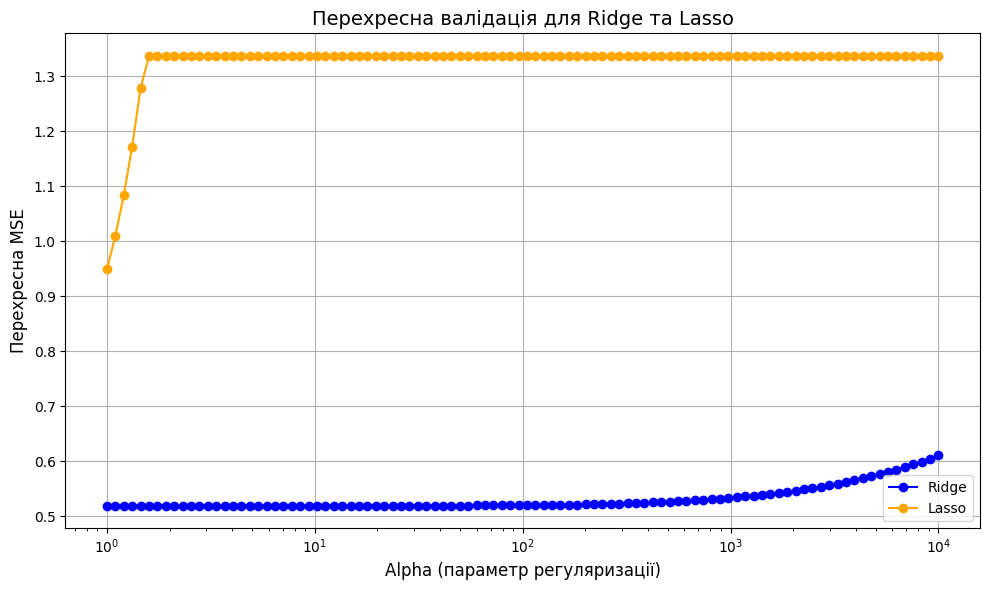

In [ ]:
# Візуалізація та висновки.
plt.figure(figsize=(10, 6))

# Побудова графіків для перехресної MSE
plt.semilogx(alphas, ridge_cv_scores, marker='o', label='Ridge', color='blue')
plt.semilogx(alphas, lasso_cv_scores, marker='o', label='Lasso', color='orange')

# Налаштування осей
plt.xlabel('Alpha (параметр регуляризації)', fontsize=12)
plt.ylabel('Перехресна MSE', fontsize=12)
plt.title('Перехресна валідація для Ridge та Lasso', fontsize=14)
plt.legend()
plt.grid(True)

# Відображення графіка
plt.tight_layout()
plt.show()


# Новый раздел

In [ ]:
# Виконати кластерізацію даних.

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

data = pd.DataFrame(housing.data, columns=housing.feature_names)
data['MedHouseVal'] = housing.target

data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


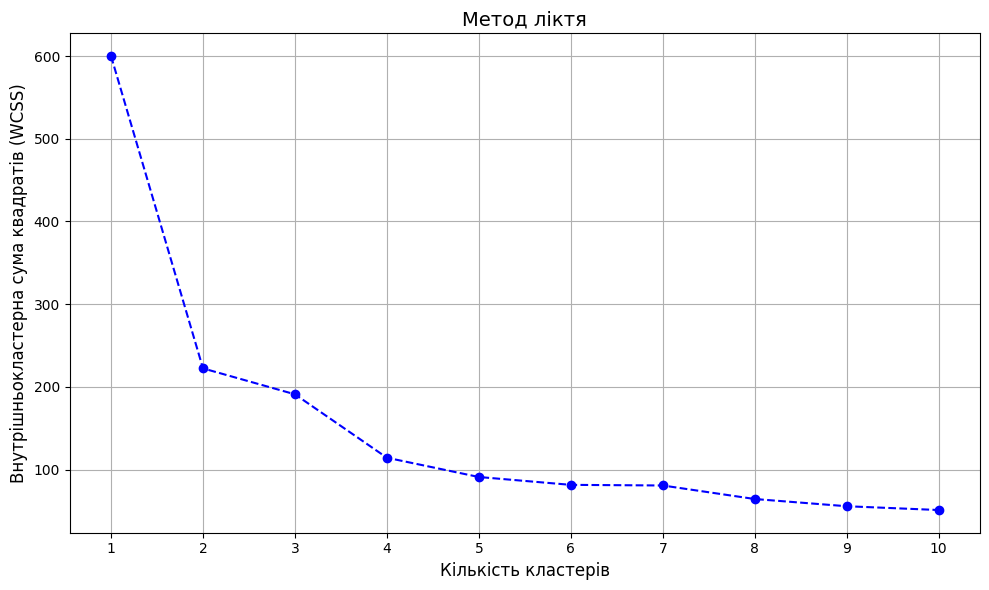

In [ ]:
# Затосувати метод ліктя або метод силуєтів.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris  # Load Iris dataset
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Завантаження даних
iris = load_iris()
data = iris.data  # Використання тільки ознак

# Масштабування даних
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Зберігання значень WCSS
wcss = []

# Обчислення WCSS для різної кількості кластерів
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

# Візуалізація результатів
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--', color='b')  # Колір лінії
plt.title('Метод ліктя', fontsize=14)  # Зміна шрифту заголовка
plt.xlabel('Кількість кластерів', fontsize=12)  # Зміна шрифту підпису осі X
plt.ylabel('Внутрішньокластерна сума квадратів (WCSS)', fontsize=12)  # Зміна шрифту підпису осі Y
plt.xticks(range(1, 11))  # Встановлення міток на осі X
plt.grid(True)
plt.tight_layout()  # Покращення розміщення елементів
plt.show()

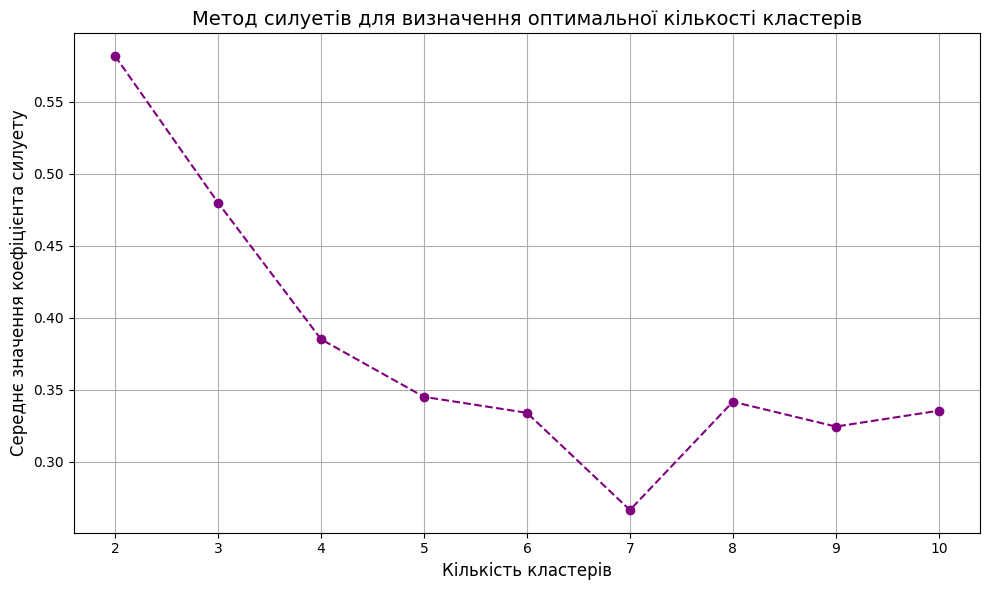

In [ ]:

from sklearn.metrics import silhouette_score
iris = load_iris()
data = iris.data  # Використання лише ознак

# Масштабування даних
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Ініціалізація списку для зберігання силуетних оцінок
silhouette_scores = []

# Обчислення середнього силуетного коефіцієнта для різної кількості кластерів
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(data_scaled)
    silhouette_avg = silhouette_score(data_scaled, labels)
    silhouette_scores.append(silhouette_avg)  # Додати значення до списку

# Візуалізація результатів
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--', color='purple')
plt.title('Метод силуетів для визначення оптимальної кількості кластерів', fontsize=14)
plt.xlabel('Кількість кластерів', fontsize=12)
plt.ylabel('Середнє значення коефіцієнта силуету', fontsize=12)
plt.xticks(range(2, 11))
plt.grid(True)
plt.tight_layout()
plt.show()

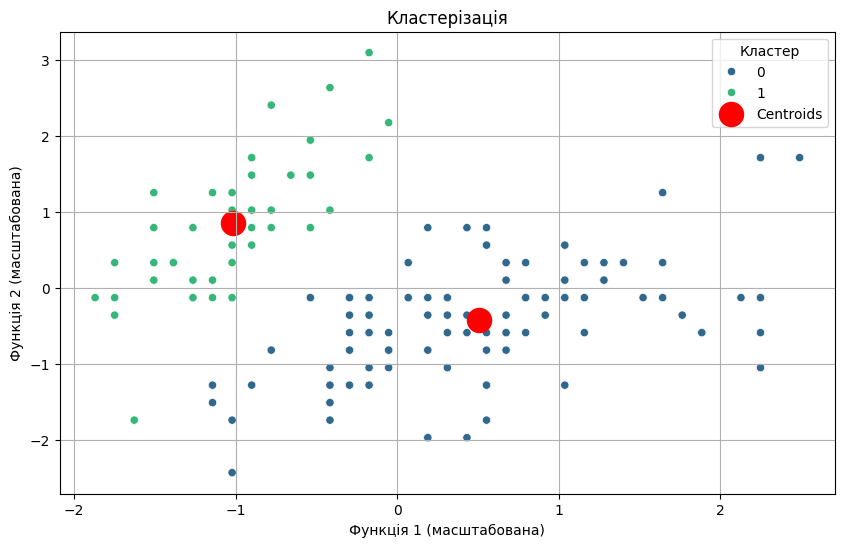

In [ ]:
# Зробити візуалізацію кластерів.
import seaborn as sns
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=42)
clusters = kmeans.fit_predict(data_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=data_scaled[:, 0], y=data_scaled[:, 1], hue=clusters, palette='viridis', legend='full')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.title('Кластерізація')
plt.xlabel('Функція 1 (масштабована)')
plt.ylabel('Функція 2 (масштабована)')
plt.legend(title='Кластер')
plt.grid(True)
plt.show()

Висновки:
Завдання 1: Навчився будувати регресійні моделі та запобігати перенавчанню через регуляризацію (Ridge і Lasso) та крос-валідацію, що покращило узагальнення моделі та знизило помилки на тестових даних.

Завдання 2: Виконав кластеризацію, використав методи ліктя та силуетів для визначення оптимальної кількості кластерів, покращив візуалізацію та зрозумів основи розподілу даних на групи.